Dataset1: Insurance Dataset (Multiple Linear Regression)

Load Data and Write script to perform following operations

Task 1: Consider the above data and perform preprocessing. 

In this task,we will first add all necessary libraries,after that we will do all the preprocessing work for cleaning our data...including encoding process...to convert categorical data to numerical data...and using head for displaying first five entries from the data.

This code scales the 'age', 'bmi', and 'children' features in your DataFrame using the StandardScaler, which centers the features around 0 and scales them to unit variance. This is a common and often necessary preprocessing step for many machine learning tasks.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error

# Load the dataset
data = pd.read_csv('insurance.csv')

# Encoding categorical variables
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])

# Checking for missing values (should be 0 in this case)
print(data.isnull().sum())

# Scaling the numerical features (age, bmi, children)
scaler = StandardScaler()
scaled_features = ['age', 'bmi', 'children']
data[scaled_features] = scaler.fit_transform(data[scaled_features])

# Display the preprocessed data
print(data.head())



age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
        age  sex       bmi  children  smoker  region      charges
0 -1.438764    0 -0.453320 -0.908614       1       3  16884.92400
1 -1.509965    1  0.509621 -0.078767       0       2   1725.55230
2 -0.797954    1  0.383307  1.580926       0       2   4449.46200
3 -0.441948    1 -1.305531 -0.908614       0       1  21984.47061
4 -0.513149    1 -0.292556 -0.908614       0       1   3866.85520


Task 2: Perform basic EDA for data analysis.

In this task, we will do the proper EDA which means Exploratory Data Analysis...from which we will find the insights of our data and also we will get to know the correlations of two different features with each other using the correlation heatmap.

By setting kde=True in sns.histplot, you're instructing Seaborn to add the KDE curve to your histogram. This curve provides a visual representation of the underlying distribution of the 'charges' data.

                age          sex           bmi      children       smoker  \
count  1.338000e+03  1338.000000  1.338000e+03  1.338000e+03  1338.000000   
mean  -1.805565e-16     0.505232 -2.124194e-16 -5.576008e-17     0.204783   
std    1.000374e+00     0.500160  1.000374e+00  1.000374e+00     0.403694   
min   -1.509965e+00     0.000000 -2.412011e+00 -9.086137e-01     0.000000   
25%   -8.691547e-01     0.000000 -7.164063e-01 -9.086137e-01     0.000000   
50%   -1.474046e-02     1.000000 -4.320880e-02 -7.876719e-02     0.000000   
75%    8.396738e-01     1.000000  6.611572e-01  7.510793e-01     0.000000   
max    1.765289e+00     1.000000  3.685522e+00  3.240619e+00     1.000000   

            region       charges  
count  1338.000000   1338.000000  
mean      1.515695  13270.422265  
std       1.104885  12110.011237  
min       0.000000   1121.873900  
25%       1.000000   4740.287150  
50%       2.000000   9382.033000  
75%       2.000000  16639.912515  
max       3.000000  63770.

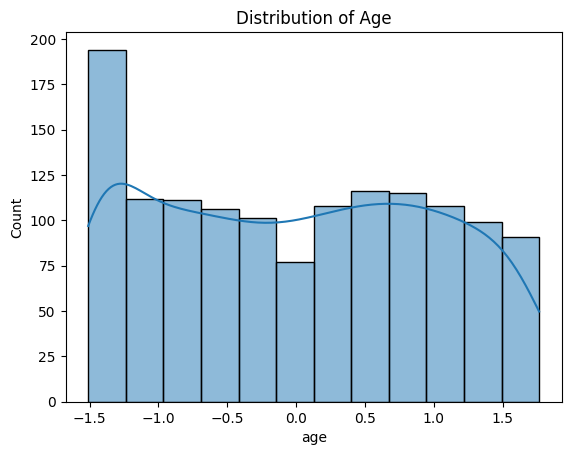

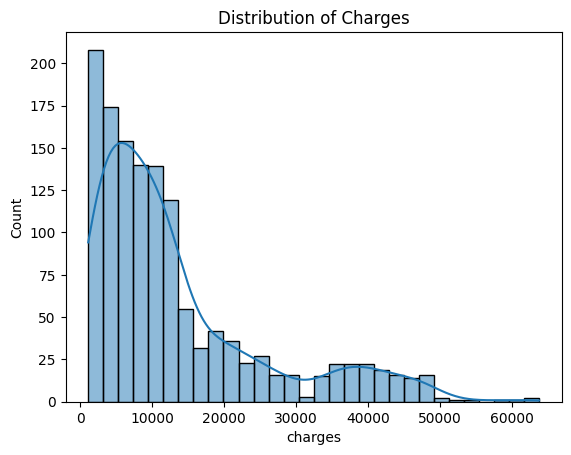

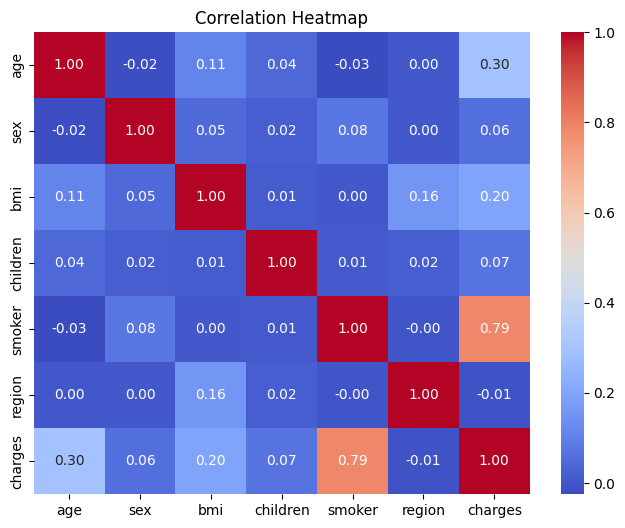

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Displaying descriptive statistics
print(data.describe())

# Visualizing the distribution of age and charges
sns.histplot(data['age'], kde=True)
plt.title('Distribution of Age')
plt.show()

sns.histplot(data['charges'], kde=True)
plt.title('Distribution of Charges')
plt.show()

# Creating a heatmap to visualize correlations
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Using pairplot for getting all the graphs of age

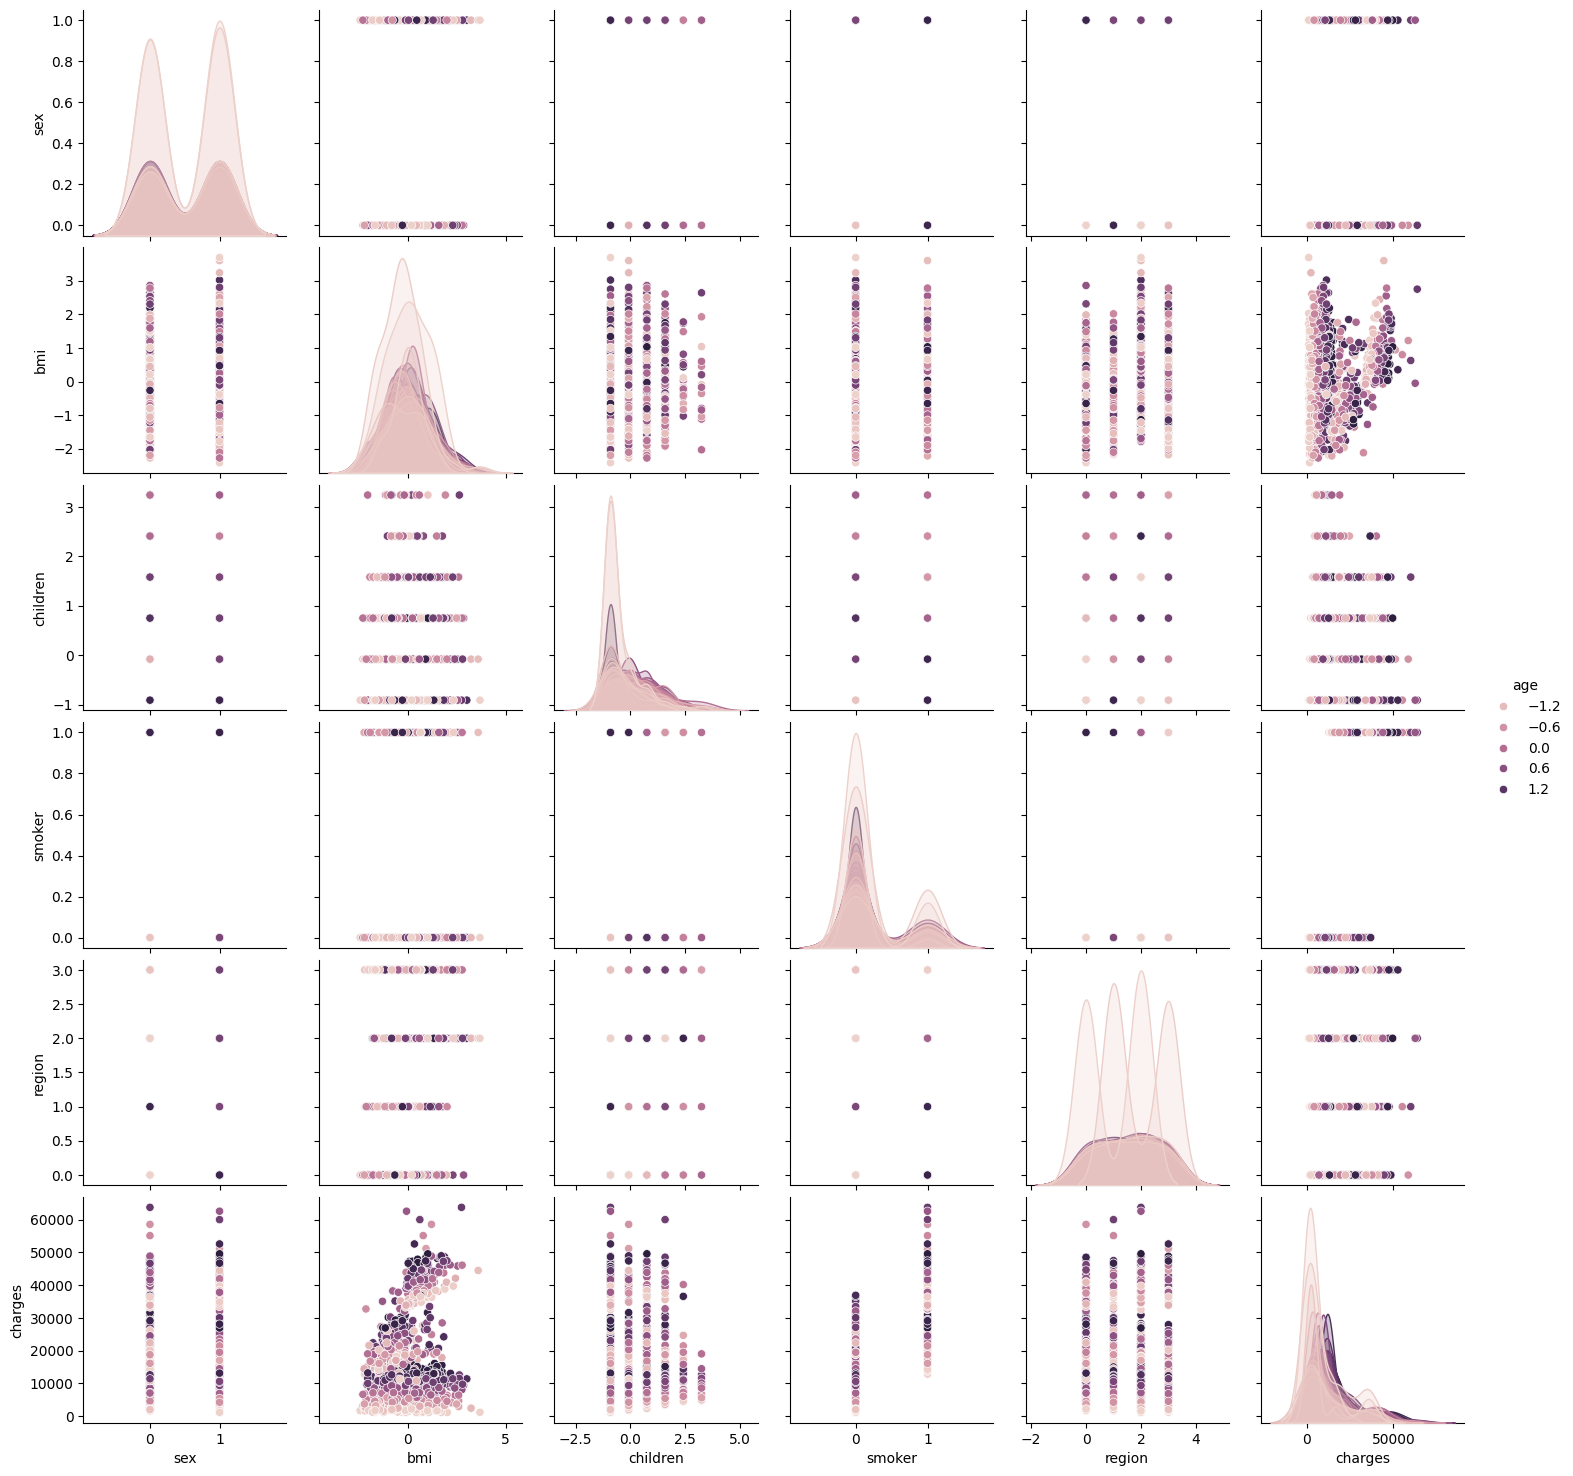

In [3]:
sns.pairplot(data, hue='age', diag_kind='kde')
plt.show()

Task 3: Perform feature engineering to select appropriate features.

Using above heatmap we get to know that the we can choose charges as the target variable and we can choose age,bmi and smoker as the feature variables as there correlations are greater than all other features.

In [4]:
from sklearn.model_selection import train_test_split

# Select features (X) and target variable (y)
X = data[['age', 'bmi', 'smoker']]  # Multiple features
y = data['charges']  # Target variable

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (1070, 3)
Test set size: (268, 3)


Task 4: Construct multiple linear regression model

Using Multiple linear regression because we have selected only three features as input and one target variable.

In [5]:
from sklearn.linear_model import LinearRegression

# Initialize the model
multiple_reg_model = LinearRegression()

# Train the model
multiple_reg_model.fit(X_train, y_train)


LinearRegression()

In [6]:
# Display model coefficients and intercept
print(f"Model Coefficients: {multiple_reg_model.coef_}")
print(f"Model Intercept: {multiple_reg_model.intercept_}")

Model Coefficients: [ 3643.34084567  1990.01046478 23675.37184666]
Model Intercept: 8472.973173828017


3643.34084567 is the coefficient for 'x1'. It means that for every one-unit increase in 'x1', the model predicts a 3643.34084567-unit increase in the target variable 'y', holding all other features constant.
1990.01046478 is the coefficient for 'x2'. It means that for every one-unit increase in 'x2', the model predicts a 1990.01046478-unit increase in 'y', holding all other features constant.
23675.37184666 is the coefficient for 'x3'. It means that for every one-unit increase in 'x3', the model predicts a 23675.37184666-unit increase in 'y', holding all other features constant

The intercept represents the predicted value of 'y' when all the independent variables ('x1', 'x2', and 'x3') are zero. In this case, when 'x1', 'x2', and 'x3' are all zero, the model predicts 'y' to be 8472.973173828017.

Task 5: Evaluate the model with appropriate metric

In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

#Make predictions on the test data
y_pred = multiple_reg_model.predict(X_test)

#Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

#Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

#Calculate rmse
rmse = np.sqrt(mse)

#Calculate mae
mae = mean_absolute_error(y_test, y_pred)


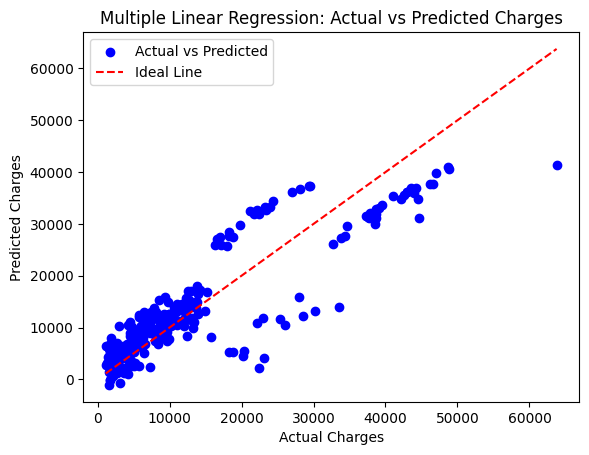

In [8]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')  # Actual vs Predicted points
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')

# Customize the plot
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Multiple Linear Regression: Actual vs Predicted Charges')
plt.legend()

# Display the plot
plt.show()

The closer the blue dots are to the red Ideal Line,the better the model's predictions.  Closer points indicate that the predicted charges are close to the actual charges.

Task 6: Generate the results

In [9]:
# Display the results in a clean format
print("\n### Model Evaluation Results ###")
print("\nMultiple Linear Regression Model:")
print(f"- Mean Squared Error (MSE): {mse:.2f}")
print(f"- R-squared (R²): {r2:.2f}")
print(f"- Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"- Mean Absolute Error (MAE): {mae:.2f}")



### Model Evaluation Results ###

Multiple Linear Regression Model:
- Mean Squared Error (MSE): 34512843.88
- R-squared (R²): 0.78
- Root Mean Squared Error (RMSE): 5874.76
- Mean Absolute Error (MAE): 4260.56


Mean Squared Error (MSE): 34,512,843.88: Lower than your previous MSE. This is a good sign.

R-squared (R²): 0.78: Higher than your previous R² (0.66). This is a significant improvement, meaning your model now explains 78% of the variance in medical charges, compared to 66% before.

Root Mean Squared Error (RMSE): 5,874.76: Lower than your previous RMSE (7,262.64). This shows that the typical prediction error has decreased.

Mean Absolute Error (MAE): 4,260.56: Lower than your previous MAE (5,625.81). This also confirms that, on average, your predictions are closer to the actual charges.